# Drone event generator 
### Numan SAHNOU - Matthieu ECCHER - Louis DELTHIL

In [ ]:
import pandas as pd
import numpy as np
import lorem
import random

names = pd.read_csv('names.csv')
cities = pd.read_csv('worldcities.csv')
df = pd.DataFrame(index=range(0,10000), columns = ['DroneID','Record','Citizen','Message', 'PeaceScore', 'Country', 'City','Latitude', 'Longitude', 'Timestamp', 'Battery', 'Alert'])

In [ ]:
cities = cities.drop(['city_ascii','iso2', 'admin_name','capital', 'population', 'id'], axis=1)
cities = cities.sample(10000)
cities = cities.reset_index(drop=True)

df[['Country','City','Latitude', 'Longitude']] = cities[['country', 'city', 'lat', 'lng']]

In [ ]:
drones = ['1','2','3','4','5','6','7','8']

df['DroneID'] = df['DroneID'].fillna(pd.Series(np.random.choice(drones, size=len(df.index))))
df

,DroneID,Record,Citizen,Message,PeaceScore,Country,City,Latitude,Longitude,Timestamp,Battery,Alert
0,3,NaN,NaN,NaN,NaN,Japan,Kuriyama,43.0564,141.7842,NaN,NaN,NaN
1,7,NaN,NaN,NaN,NaN,Malta,Qala,36.0361,14.3094,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,Germany,Königstein im Taunus,50.1831,8.4635,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,Taiwan,Changhua,24.0667,120.5333,NaN,NaN,NaN
4,1,NaN,NaN,NaN,NaN,United States,Brattleboro,42.8618,-72.6145,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,NaN,NaN,NaN,NaN,Turkey,Konya,37.8714,32.4847,NaN,NaN,NaN
9996,2,NaN,NaN,NaN,NaN,Brazil,Araxá,-19.5928,-46.9408,NaN,NaN,NaN
9997,1,NaN,NaN,NaN,NaN,United States,Chehalis,46.6638,-122.9650,NaN,NaN,NaN
9998,6,NaN,NaN,NaN,NaN,United Kingdom,Cannock,52.6910,-2.0270,NaN,NaN,NaN


In [ ]:
names['full_name'] = names[['firstname','lastname']].apply(lambda x: ' '.join(x), axis=1)
names = names.drop(['firstname','lastname'], axis=1)
names = names.values.tolist()

In [ ]:
def flatten(input):
    new_list = []
    for i in input:
        for j in i:
            new_list.append(j)
    return new_list

names = flatten(names)
df['Citizen'] = names

In [ ]:
df.Message = df.Message.apply(lambda x: lorem.sentence())
df

,DroneID,Record,Citizen,Message,PeaceScore,Country,City,Latitude,Longitude,Timestamp,Battery,Alert
0,3,NaN,Lyssa Pattin,Dolore velit numquam adipisci est consectetur.,NaN,Japan,Kuriyama,43.0564,141.7842,NaN,NaN,NaN
1,7,NaN,Lita Johnsson,Ut quiquia sed sit est numquam tempora amet.,NaN,Malta,Qala,36.0361,14.3094,NaN,NaN,NaN
2,7,NaN,Annice Cohdwell,Dolorem numquam numquam sed aliquam modi est.,NaN,Germany,Königstein im Taunus,50.1831,8.4635,NaN,NaN,NaN
3,4,NaN,Gwyneth Beebe,Est voluptatem ut modi tempora aliquam.,NaN,Taiwan,Changhua,24.0667,120.5333,NaN,NaN,NaN
4,1,NaN,Ileana Vorster,Dolor magnam sit magnam sit ipsum.,NaN,United States,Brattleboro,42.8618,-72.6145,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,NaN,Romona Manolo,Adipisci etincidunt neque porro sed consectetu...,NaN,Turkey,Konya,37.8714,32.4847,NaN,NaN,NaN
9996,2,NaN,Ruthe Eiser,Porro tempora consectetur modi.,NaN,Brazil,Araxá,-19.5928,-46.9408,NaN,NaN,NaN
9997,1,NaN,Dianemarie Tatianas,Neque sit quiquia quaerat sed.,NaN,United States,Chehalis,46.6638,-122.9650,NaN,NaN,NaN
9998,6,NaN,Ethel Salchunas,Eius ipsum consectetur neque.,NaN,United Kingdom,Cannock,52.6910,-2.0270,NaN,NaN,NaN


In [ ]:
alerts = [0, 1]
scores = [1,2,3,4,5,6,7,8,9,10]

for index, row in df.iterrows():
    df['Battery'][index] = random.randint(1,100)
    df['PeaceScore'][index] = int(np.random.choice(scores, 1, p=[0.01, 0.03,0.05,0.10,0.20,0.20, 0.25, 0.10, 0.05, 0.01]))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Generate unique random Record number 

In [ ]:
records = random.sample(range(20000), 10000)
records = pd.DataFrame(records, columns =['rec'])
records = records.rec.astype(str)

df.Record = cities.iso3 + '-' + df.DroneID +'/'+ records

### Fonction qui permet de générer un timestamp (du 01/02/2021 au 28/02/2021) différent  pour un même drone mais qui peut être identique pour 2 drones différents

In [ ]:
def fill_ts(df, id_drone):
    mask = (df['DroneID'] == id_drone)
    df2 = df[mask]
    ts=[]
    while(len(ts) != len(df[mask])):
        r=random.randint(1612180800, 1614513600)
        if r not in ts: ts.append(r)        
    df2.Timestamp = ts
    df[mask] = df2
    return df

In [ ]:
drones = pd.DataFrame(drones, columns =['DroneID'])
drones.DroneID.apply(lambda x: fill_ts(df, x))

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0         DroneID       Record              Citizen...
1         DroneID       Record              Citizen...
2         DroneID       Record              Citizen...
3         DroneID       Record              Citizen...
4         DroneID       Record              Citizen...
5         DroneID       Record              Citizen...
6         DroneID       Record              Citizen...
7         DroneID       Record              Citizen...
Name: DroneID, dtype: object

## Repartition of Alert Trigger following the PeaceScore 

In [ ]:
def fill_alert(df, peacescore):
    mask = (df['PeaceScore'] == peacescore)
    df2 = df[mask]
    if(peacescore == 1):
        for index, row in df2.iterrows():
            df2['Alert'][index] = int(np.random.choice(alerts, 1, p=[0.3, 0.7])) #70% de chance en plus de se faire alerté par le drone
    elif(peacescore == 2):
        for index, row in df2.iterrows():
            df2['Alert'][index] = int(np.random.choice(alerts, 1, p=[0.4, 0.6])) #60% de chance en plus de se faire alerté par le drone
    elif(peacescore == 3):
        for index, row in df2.iterrows():
            df2['Alert'][index] = int(np.random.choice(alerts, 1, p=[0.5, 0.5])) #50% de chance en plus de se faire alerté par le drone
    elif(peacescore == 4):
        for index, row in df2.iterrows():
            df2['Alert'][index] = int(np.random.choice(alerts, 1, p=[0.75, 0.25])) #25% de chance en plus de se faire alerté par le drone
    elif(peacescore == 5):
        for index, row in df2.iterrows():
            df2['Alert'][index] = int(np.random.choice(alerts, 1, p=[0.95, 0.05])) #5% de chance en plus de se faire alerté par le drone
    else:
        for index, row in df2.iterrows():
            df2['Alert'][index] = int(np.random.choice(alerts, 1, p=[0.99, 0.01])) #1% de chance en plus de se faire alerté par le drone

    df[mask] = df2
    return df

In [ ]:
scores = pd.DataFrame(scores, columns =['PeaceScore'])
scores.PeaceScore.apply(lambda x: fill_alert(df, x))

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/shared-libs/python3

0         DroneID       Record              Citizen...
1         DroneID       Record              Citizen...
2         DroneID       Record              Citizen...
3         DroneID       Record              Citizen...
4         DroneID       Record              Citizen...
5         DroneID       Record              Citizen...
6         DroneID       Record              Citizen...
7         DroneID       Record              Citizen...
8         DroneID       Record              Citizen...
9         DroneID       Record              Citizen...
Name: PeaceScore, dtype: object

In [ ]:
df

,DroneID,Record,Citizen,Message,PeaceScore,Country,City,Latitude,Longitude,Timestamp,Battery,Alert
0,3,JPN-3/16554,Lyssa Pattin,Dolore velit numquam adipisci est consectetur.,4,Japan,Kuriyama,43.0564,141.7842,1613440315,57,0
1,7,MLT-7/12310,Lita Johnsson,Ut quiquia sed sit est numquam tempora amet.,5,Malta,Qala,36.0361,14.3094,1612462219,64,0
2,7,DEU-7/1201,Annice Cohdwell,Dolorem numquam numquam sed aliquam modi est.,7,Germany,Königstein im Taunus,50.1831,8.4635,1613606102,90,0
3,4,TWN-4/18660,Gwyneth Beebe,Est voluptatem ut modi tempora aliquam.,4,Taiwan,Changhua,24.0667,120.5333,1613195752,16,0
4,1,USA-1/14336,Ileana Vorster,Dolor magnam sit magnam sit ipsum.,7,United States,Brattleboro,42.8618,-72.6145,1614103031,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,TUR-1/1880,Romona Manolo,Adipisci etincidunt neque porro sed consectetu...,7,Turkey,Konya,37.8714,32.4847,1613422073,71,0
9996,2,BRA-2/17436,Ruthe Eiser,Porro tempora consectetur modi.,5,Brazil,Araxá,-19.5928,-46.9408,1612692564,95,0
9997,1,USA-1/5356,Dianemarie Tatianas,Neque sit quiquia quaerat sed.,9,United States,Chehalis,46.6638,-122.9650,1614295241,55,0
9998,6,GBR-6/17229,Ethel Salchunas,Eius ipsum consectetur neque.,4,United Kingdom,Cannock,52.6910,-2.0270,1613234111,25,0


## On vérifie la distribution des Alertes selon le PeaceScore

Text(0, 0.5, 'Population')

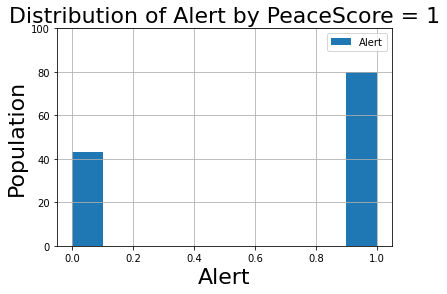

In [ ]:
from matplotlib import pyplot as plt
mask = (df['PeaceScore'] == 1)


df[mask].Alert.hist(legend=True)

plt.ylim(0, 100)
plt.title("Distribution of Alert by PeaceScore = 1", fontsize=22)
plt.xlabel("Alert", fontsize=22)
plt.ylabel("Population", fontsize=22)

## On vérifie que pour un même timestamp, ce n'est jamais le même drone qui repère un individu

In [ ]:
m = (df.Timestamp == 1614072058)
df[m]

,DroneID,Record,Citizen,Message,PeaceScore,Country,City,Latitude,Longitude,Timestamp,Battery,Alert
14,8,USA-8/17101,Valera Alwin,Neque dolorem labore est dolor ipsum.,2,United States,Ann Arbor,42.2755,-83.7312,1614072058,87,0
8971,3,SRB-3/8766,Elie Wildermuth,Amet adipisci dolor aliquam.,6,Serbia,Prokuplje,43.2339,21.5861,1614072058,65,0


## Export CSV File

In [ ]:
df.to_csv(r'drone_event.csv', index = False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f70a1145-bf55-4566-b60e-eb4582115330' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>